# 1 Pre-Processing

In [277]:
# Load Python libraries
import pandas as pd
import sqlalchemy
import seaborn as sns
import matplotlib.pyplot as plt

In [278]:
#Connect to Database to access the Cars data table
engine = sqlalchemy.create_engine('mysql+pymysql://root@localhost:3306/final')

In [279]:
#Load the cars database table into a Pandas dataframe named cars
cars = pd.read_sql_table("temp",engine)

In [280]:
#Convert OrderDate and ShipDate dataframe column into Datetime, since the OrderDate and ShipDate column are of type String inside the database's cars table 
cars['OrderDate']= pd.to_datetime(cars['OrderDate']) 
cars['ShipDate']= pd.to_datetime(cars['ShipDate']) 

In [281]:
#Check the data types of each column of the cars dataframe to see if all columns are in correct and expected format
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
SupplierID                1000 non-null int64
SupplierAddress           1000 non-null object
SupplierName              1000 non-null object
SupplierContactDetails    1000 non-null object
ProductID                 1000 non-null int64
CarMaker                  1000 non-null object
CarModel                  1000 non-null object
CarColor                  1000 non-null object
CarModelYear              1000 non-null int64
CarPrice                  1000 non-null float64
CustomerID                1000 non-null object
CustomerName              1000 non-null object
Gender                    1000 non-null object
JobTitle                  1000 non-null object
PhoneNumber               1000 non-null object
EmailAddress              1000 non-null object
City                      1000 non-null object
Country                   1000 non-null object
CountryCode               1000 non-null object
Sta

# 2 Data Exploration

## 2.1 Gender wise Number of Orders, Total Sales of Car

In [282]:
#Executing SQL queries using Python to pull the Gender related data from the database. 
query = '''select Gender,count(*) as number_of_orders, ROUND(sum(Sales)/1000000, 2) as Total_sales_in_Millions,ROUND((sum(Sales)/count(*))/1000000 , 2)  as Average_saleprice_per_order_in_Millions from temp group by Gender;'''
df = pd.read_sql_query(query,engine)

Text(0, 0.5, 'Number of Orders')

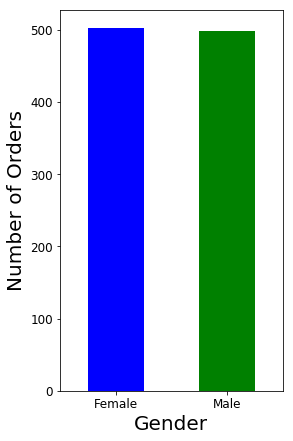

In [283]:
#Bar plot of Number of Orders per Gender categories
ax=df.set_index('Gender').number_of_orders.plot(kind='bar',figsize=(4,7),fontsize=12,color=['b', 'g'],rot=0)
ax.set_xlabel("Gender",fontsize=20)
ax.set_ylabel("Number of Orders",fontsize=20)

Text(0, 0.5, 'Total Sales(in Millions)')

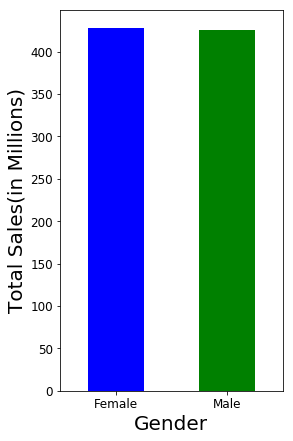

In [284]:
#Bar plot of Number of Orders per Gender categories
ax=df.set_index('Gender').Total_sales_in_Millions.plot(kind='bar',figsize=(4,7),fontsize=12,color=['b', 'g'],rot=0)
ax.set_xlabel("Gender",fontsize=20)
ax.set_ylabel("Total Sales(in Millions)",fontsize=20)

Text(0, 0.5, '')

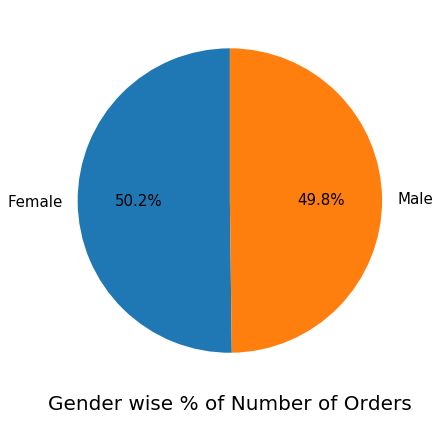

In [285]:
#Pie plot of % of Number of Orders per Gender categories
ax=df.set_index('Gender')['number_of_orders'].plot.pie(subplots=False, figsize=(7,7), textprops={'fontsize': 15}, autopct='%1.1f%%',
        startangle=90)
ax.set_xlabel('Gender wise % of Number of Orders',fontsize=20)
ax.set_ylabel('')


Text(0, 0.5, '')

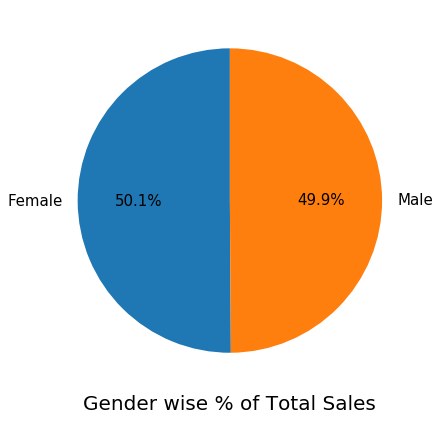

In [286]:
#Pie plot of % of Total Sales per Gender categories
ax=df.set_index('Gender')['Total_sales_in_Millions'].plot.pie(subplots=False, figsize=(7,7), textprops={'fontsize': 15}, autopct='%1.1f%%',
        startangle=90)
ax.set_xlabel('Gender wise % of Total Sales',fontsize=20)
ax.set_ylabel('')


# 2. Data Exploration

## 2.1 Car Brand:

### 2.1.1 Car brand wise Number of Orders

In [287]:
#Executing SQL queries using Python to pull the Car brand related data from the database. 
query = '''select CarMaker,count(*) as number_of_orders, ROUND(sum(Sales)/1000000, 2) as Total_sales_in_Millions,ROUND((sum(Sales)/count(*))/1000000 , 2)  as Average_saleprice_per_order_in_Millions from temp group by CarMaker;'''
df = pd.read_sql_query(query,engine)

Text(0, 0.5, 'Number of Orders')

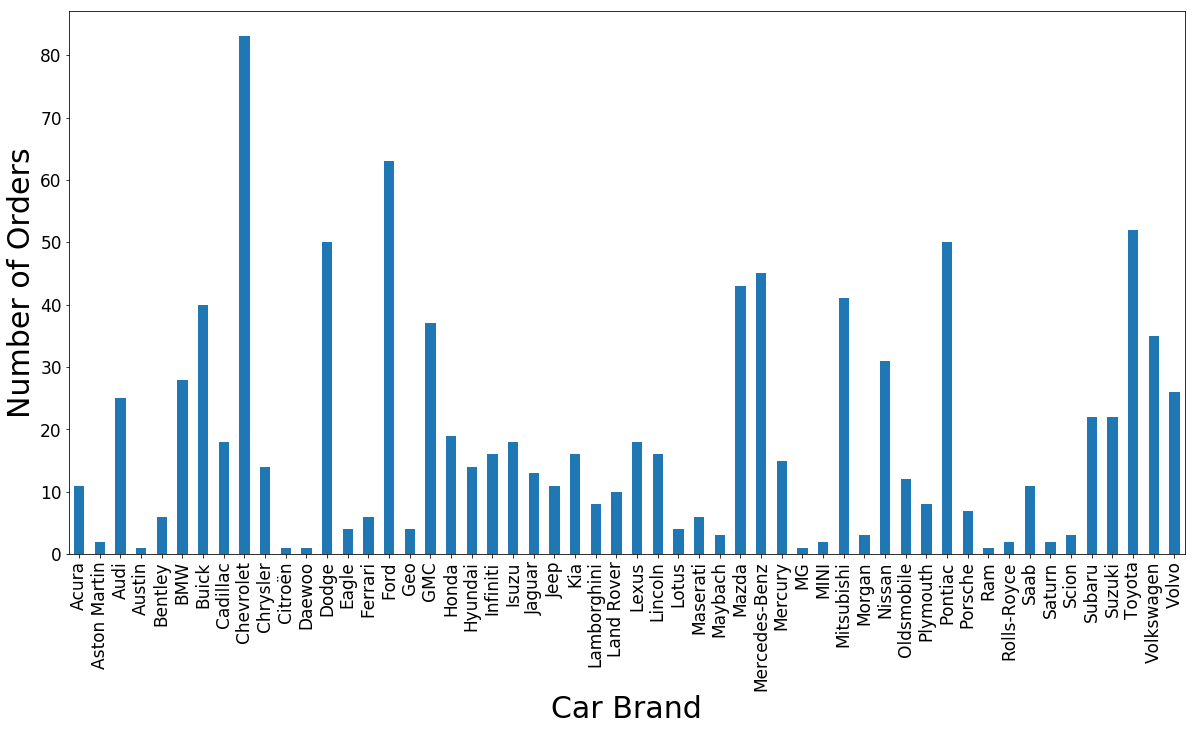

In [288]:
#Bar plot of Number of Orders for each Car brands
ax=df.set_index('CarMaker').number_of_orders.plot(kind='bar',figsize=(20,10),rot=90,fontsize=17)
ax.set_xlabel("Car Brand",fontsize=30)
ax.set_ylabel("Number of Orders",fontsize=30)

### 2.1.2 Car brand wise Total Sales of cars(in Millions)

Text(0, 0.5, 'Total Sales(in Millions)')

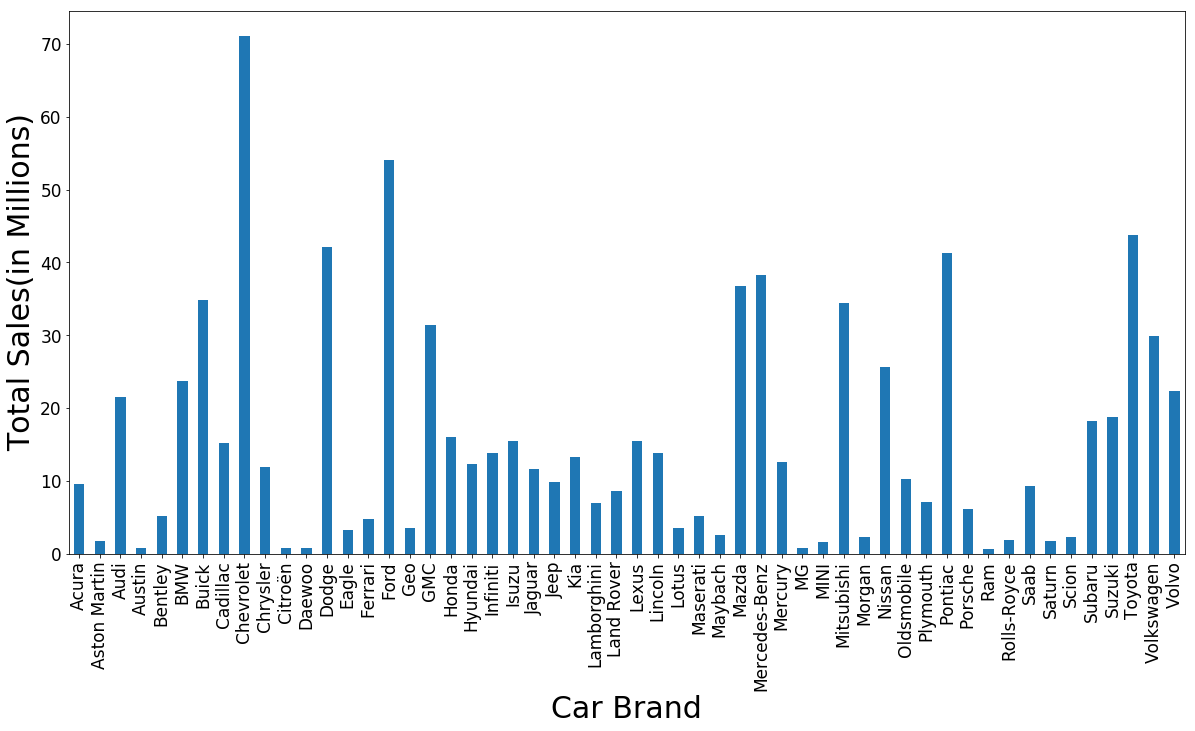

In [289]:
#Bar plot of Total Sales(in Millions) for each Car brands
ax=df.set_index('CarMaker').Total_sales_in_Millions.plot(kind='bar',figsize=(20,10),rot=90,fontsize=17)
ax.set_xlabel("Car Brand",fontsize=30)
ax.set_ylabel("Total Sales(in Millions)",fontsize=30)

### 2.1.3 Car brand wise  Average Selling Price per Order(in Millions)

Text(0, 0.5, 'Avg Selling Price per order(in Millions)')

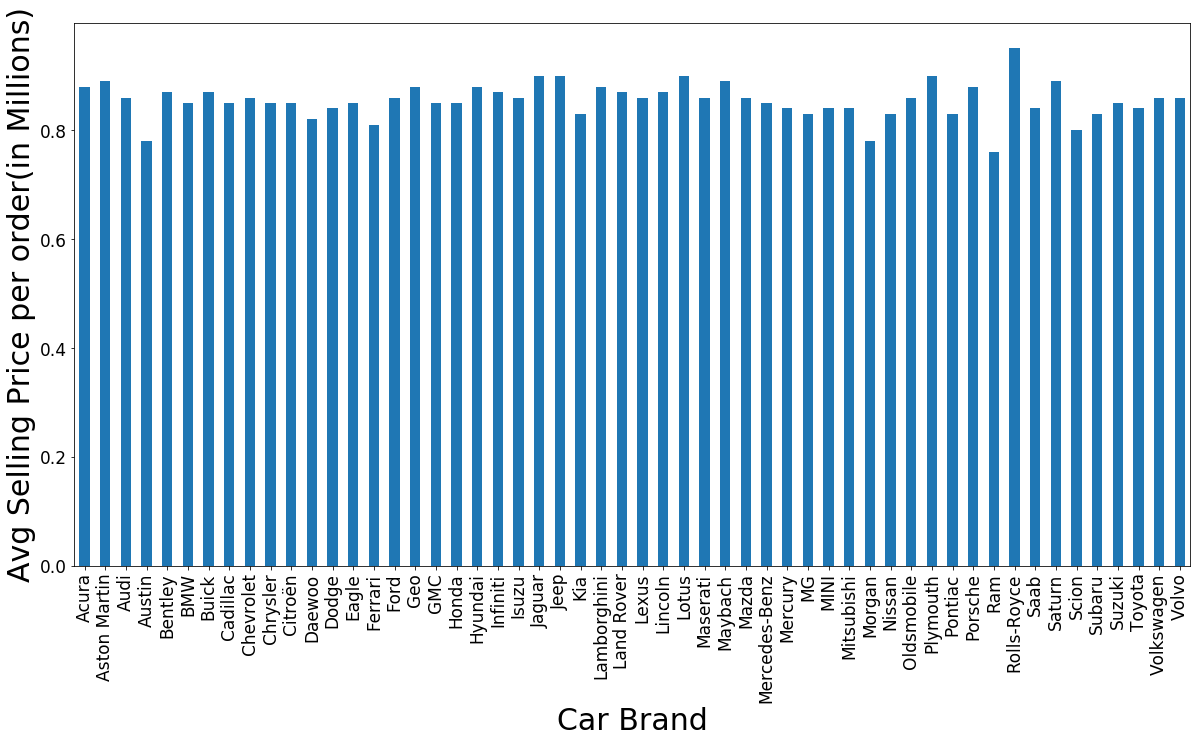

In [290]:
#Bar plot of Average Selling Price per Order(in Millions) for each Car brands
ax=df.set_index('CarMaker').Average_saleprice_per_order_in_Millions.plot(kind='bar',figsize=(20,10),rot=90,fontsize=17)
ax.set_xlabel("Car Brand",fontsize=30)
ax.set_ylabel("Avg Selling Price per order(in Millions)",fontsize=30)

### 2.1.4 Car brand wise Sales Market share

Text(0, 0.5, '')

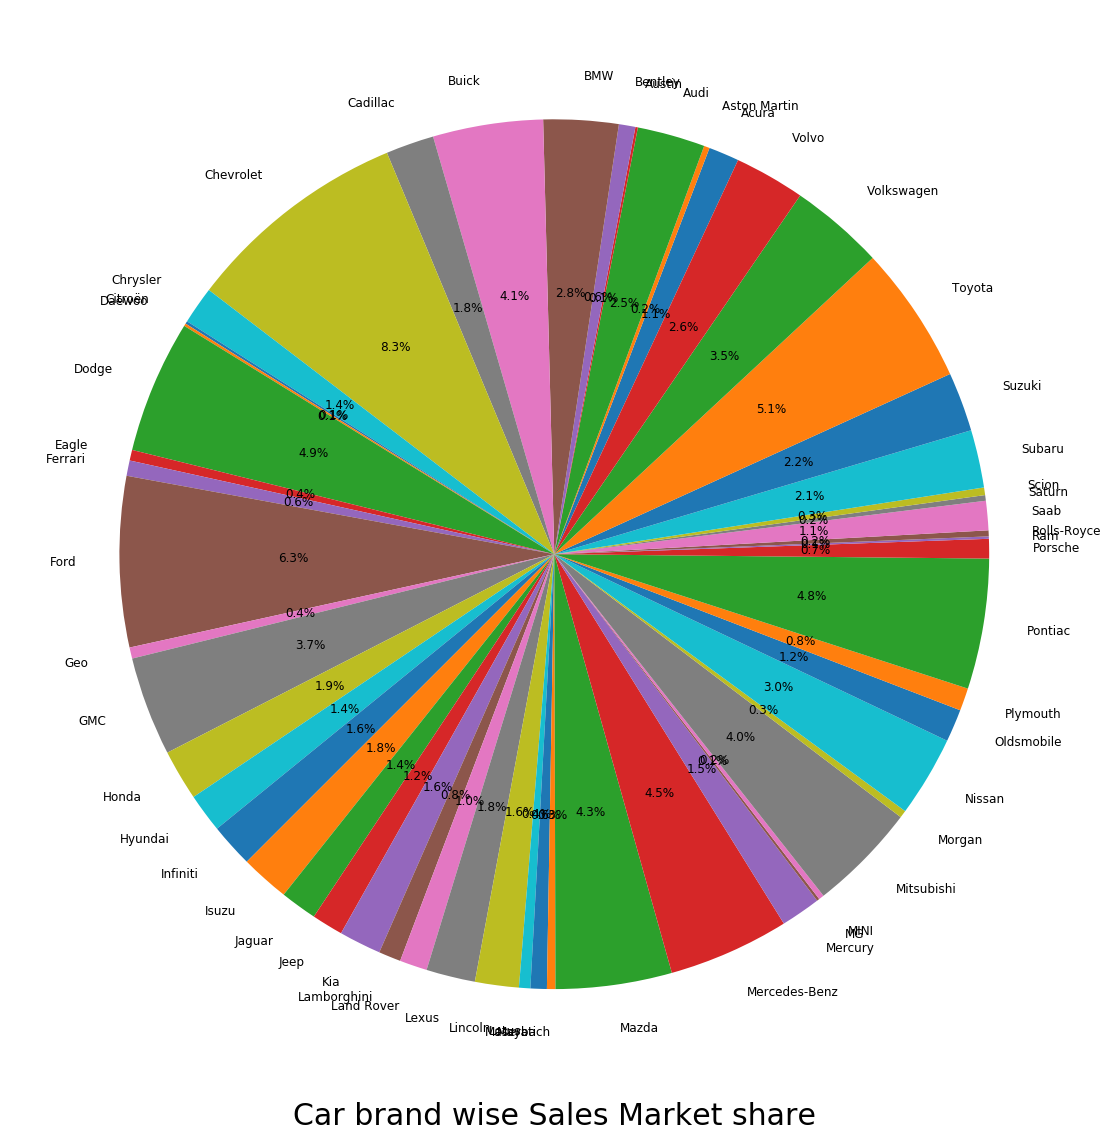

In [291]:
#Pie chart of Market share by Sales for each Car brand
ax=df.set_index('CarMaker')['Total_sales_in_Millions'].plot.pie(subplots=False, figsize=(20,20), textprops={'fontsize': 12}, autopct='%1.1f%%',
        startangle=65)
ax.set_xlabel('Car brand wise Sales Market share',fontsize=30)
ax.set_ylabel('')


## 2.2 State:

### 2.2.1 State wise Number of Orders

In [292]:
#Executing SQL queries using Python to pull the State related data from the database. 
query = '''select State,count(*) as number_of_orders, ROUND(sum(Sales)/1000000, 2) as Total_sales_in_Millions,ROUND((sum(Sales)/count(*))/1000000 , 2)  as Average_saleprice_per_order_in_Millions from temp group by State;'''
df = pd.read_sql_query(query,engine)

Text(0, 0.5, 'Number of Orders')

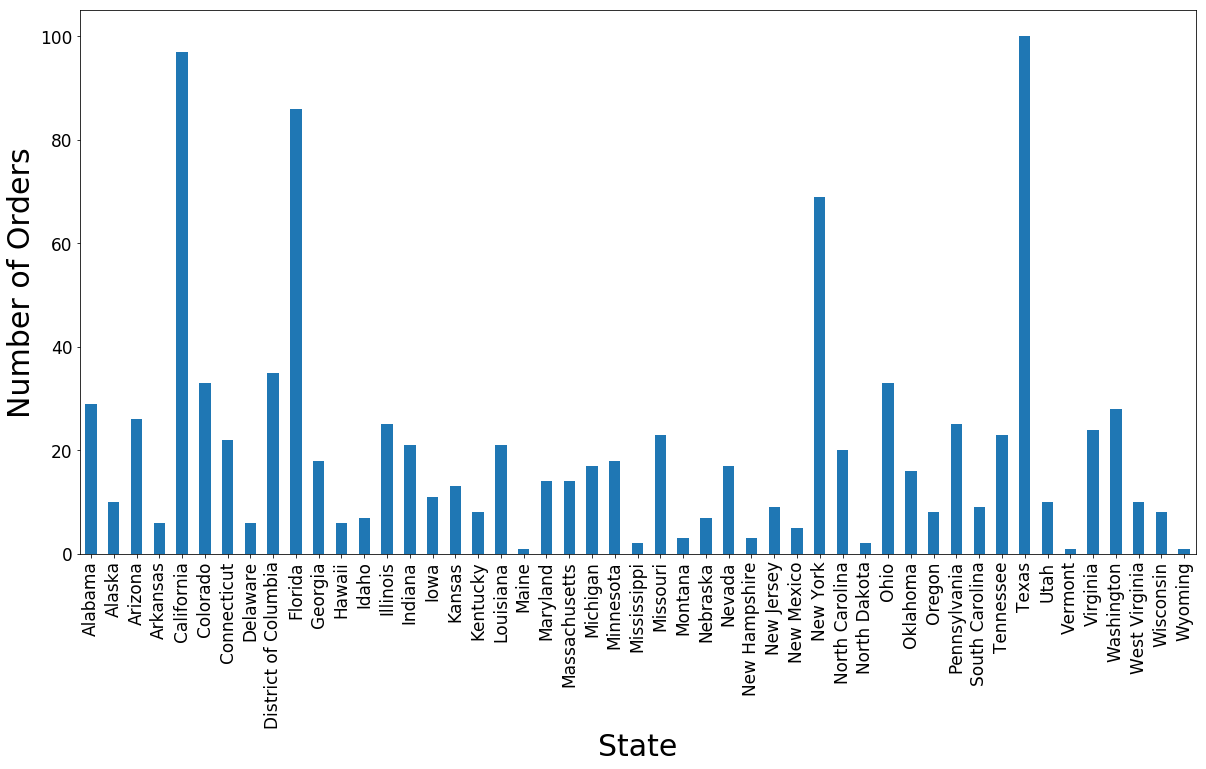

In [293]:
#Bar plot of Number of Orders for each State
ax=df.set_index('State').number_of_orders.plot(kind='bar',figsize=(20,10),rot=90,fontsize=17)
ax.set_xlabel("State",fontsize=30)
ax.set_ylabel("Number of Orders",fontsize=30)

### 2.2.2 State wise Total sales of cars(in Millions)

Text(0, 0.5, 'Total Sales(in Millions)')

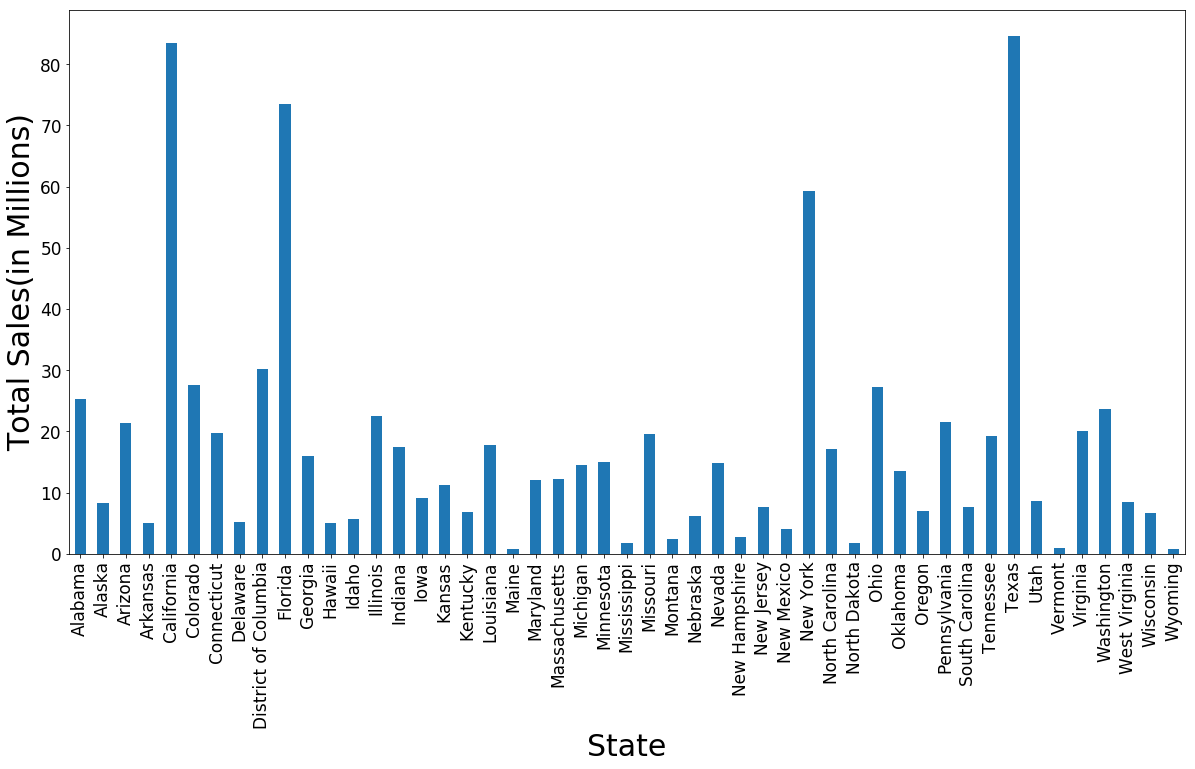

In [294]:
#Bar plot of Total Sales(in Millions) for each State
ax=df.set_index('State').Total_sales_in_Millions.plot(kind='bar',figsize=(20,10),rot=90,fontsize=17)
ax.set_xlabel("State",fontsize=30)
ax.set_ylabel("Total Sales(in Millions)",fontsize=30)

### 2.2.3 Car brand wise Average Selling Price per Order(in Millions)

Text(0, 0.5, 'Avg Selling Price per order(in Millions)')

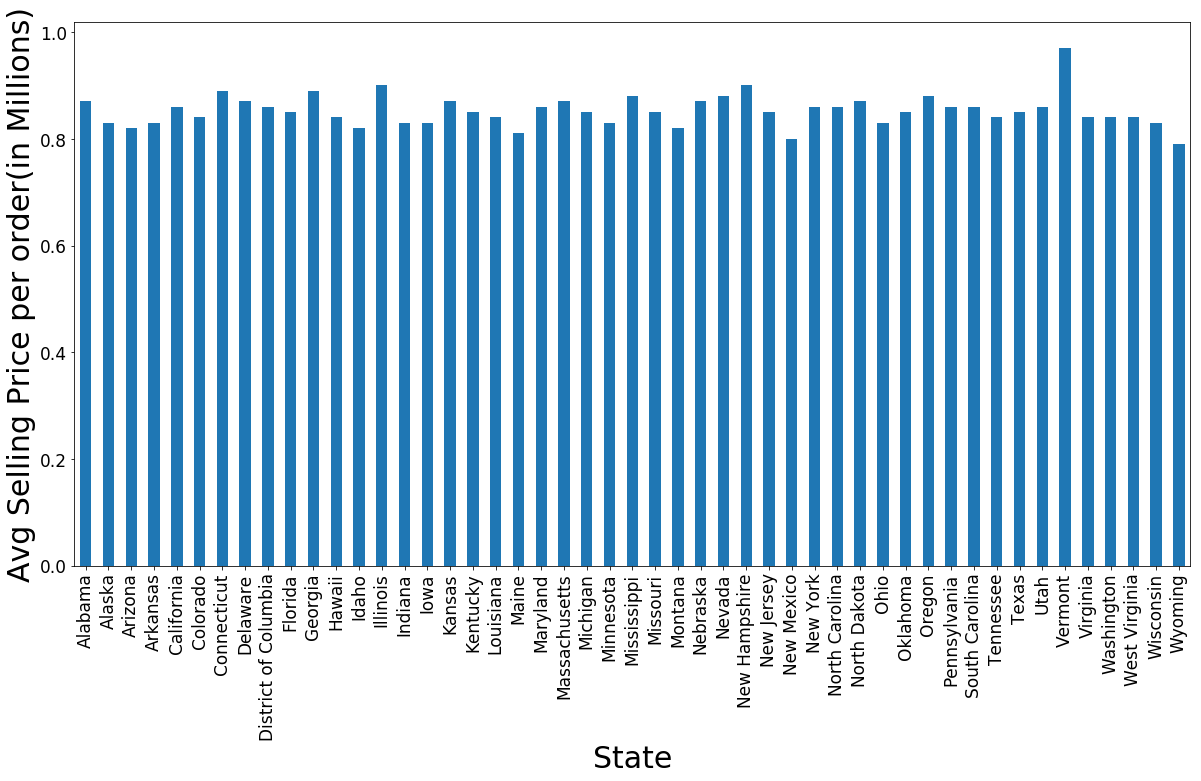

In [295]:
#Bar plot of Average Selling Price per Order(in Millions) for each State
ax=df.set_index('State').Average_saleprice_per_order_in_Millions.plot(kind='bar',figsize=(20,10),rot=90,fontsize=17)
ax.set_xlabel("State",fontsize=30)
ax.set_ylabel("Avg Selling Price per order(in Millions)",fontsize=30)

### 2.2.4 State wise Sales Market share

Text(0, 0.5, '')

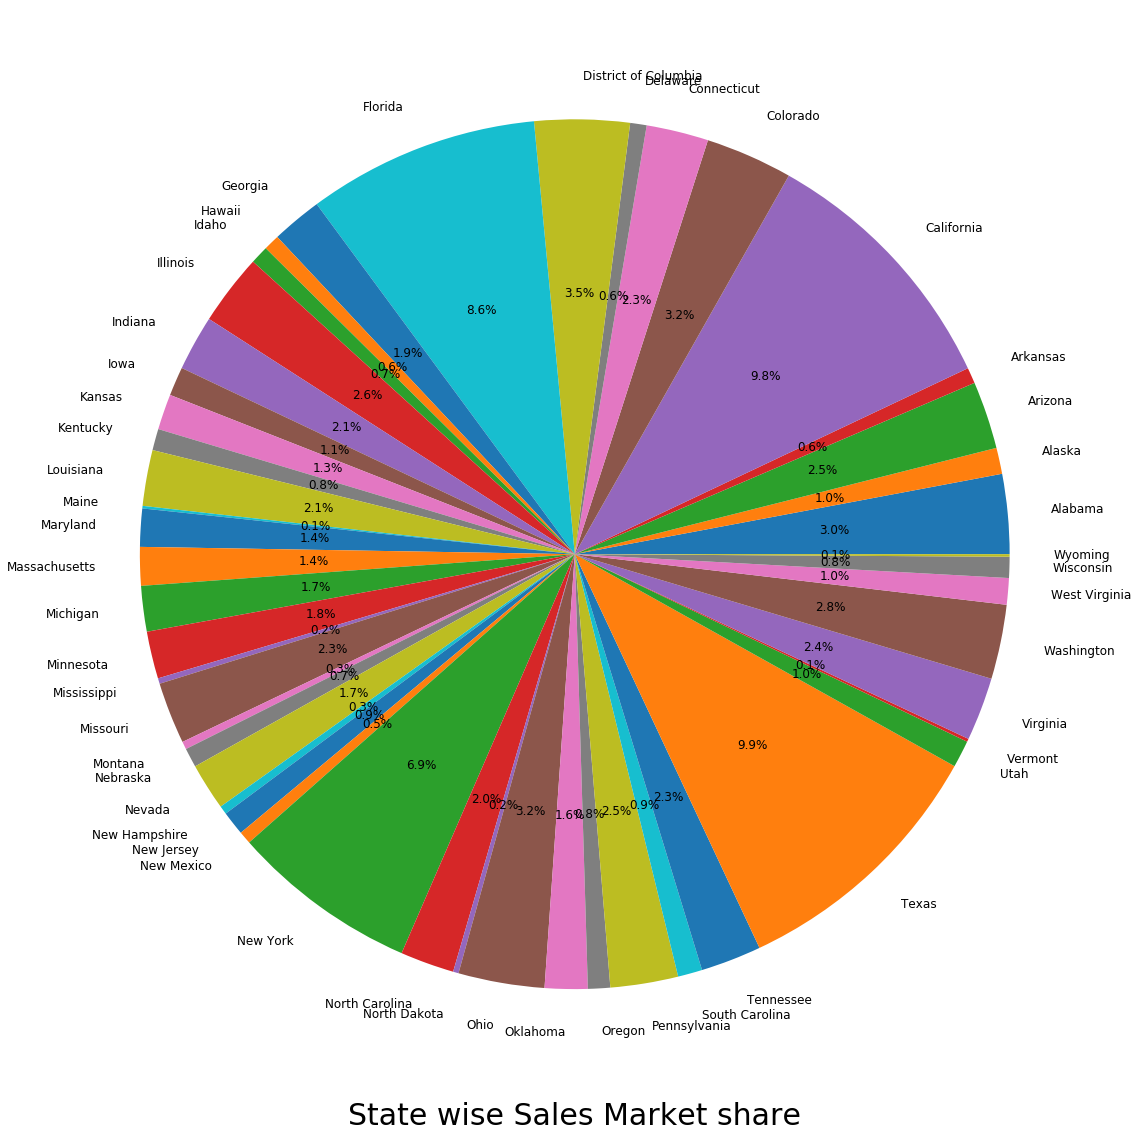

In [296]:
#Pie chart of Market share by Sales for each State
ax=df.set_index('State')['Total_sales_in_Millions'].plot.pie(subplots=False, figsize=(20,20), textprops={'fontsize': 12}, autopct='%1.1f%%',
        startangle=0)
ax.set_xlabel('State wise Sales Market share',fontsize=30)
ax.set_ylabel('')


# 3 Data Analytics

## 3.1 Clustering/segmentation of Car Brands using KMeans algo into HIGH EARNER, MEDIUM EARNER and LOW EARNER

In [297]:
#Executing SQL queries using Python to pull the Car brand related data from the database.
query = '''select CarMaker,count(*) as number_of_orders, ROUND(sum(Sales)/1000000, 2) as Total_sales_in_Millions,ROUND((sum(Sales)/count(*))/1000000 , 2)  as Average_saleprice_per_order_in_Millions from temp group by CarMaker;'''
df = pd.read_sql_query(query,engine)

In [298]:
#Importing KMeans Clustering algorithm from Sklearn Python library
#Create 3 Clusters using KMeans algo based on the columns number_of_orders & Average_saleprice_per_order_in_Millions from the dataframe named df
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=3, random_state=0).fit(df[['Average_saleprice_per_order_in_Millions','number_of_orders']])
kmeans.labels_

array([0, 0, 2, 0, 0, 2, 1, 2, 1, 2, 0, 0, 1, 0, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 2, 2, 1, 1, 2])

In [299]:
#Creating a temporary dataframe to store the Cluster values created using KMeans algorithm
temp=pd.DataFrame(kmeans.labels_)
temp.columns = ['Cluster']

In [300]:
#Concatenating the original dataframe along with a new column which contains the Clustering values returned by the KMeans algorithm
temp = pd.concat([df, temp], axis=1, join_axes=[df.index])

C:\Users\mdami\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  


In [301]:
#Creating a new column named Demand_Cluster based on the Clustering values returned by KMeans algo
#if KMeans value =1 then HIGH EARNER
#if KMeans value =2 then MEDIUM EARNER
#if KMeans value =0 then LOW EARNER
temp.loc[temp.Cluster ==2, 'Demand_Cluster'] = 'MEDIUM EARNER' 
temp.loc[temp.Cluster ==1, 'Demand_Cluster'] = 'HIGH EARNER' 
temp.loc[temp.Cluster ==0, 'Demand_Cluster'] = 'LOW EARNER' 

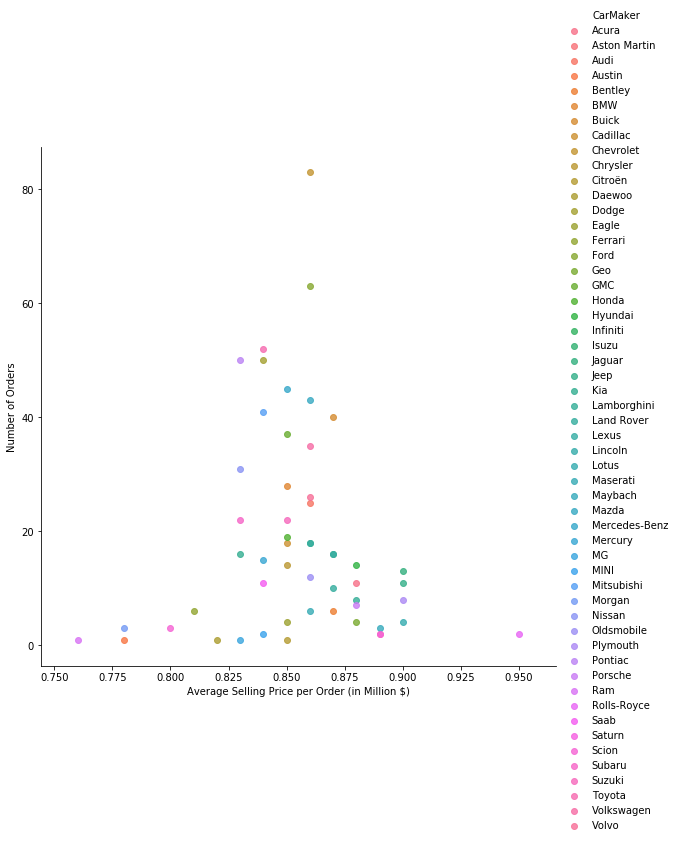

In [302]:
#Original View based on the Number of Orders and Average Selling Price per Order (in Million $), points are colored by Car Brands
#sns.set(font_scale=0.9)
g=sns.lmplot( x='Average_saleprice_per_order_in_Millions', y='number_of_orders', data=df, fit_reg=False, hue='CarMaker', legend=True,height=8)
g.set_axis_labels("Average Selling Price per Order (in Million $)",
 "Number of Orders") 

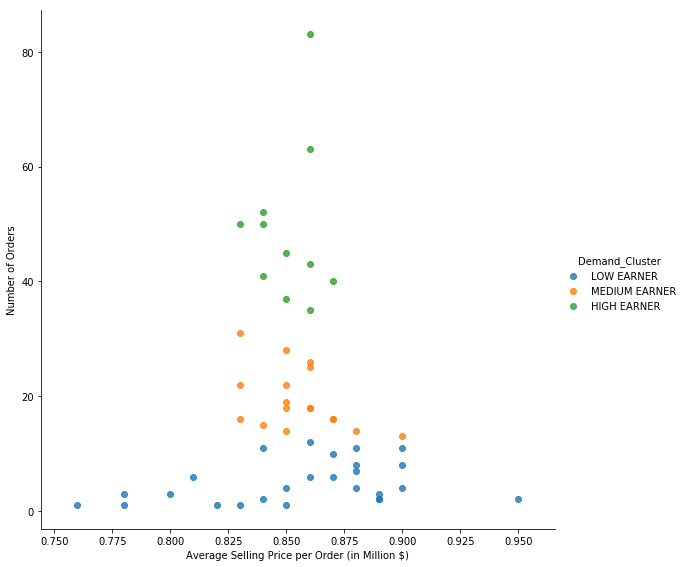

In [303]:
#Clustered View based on Number of Orders and Average Selling Price per Order (in Million $), points are colored by Clustering values
g=sns.lmplot( y='number_of_orders',x='Average_saleprice_per_order_in_Millions', data=temp, fit_reg=False, hue='Demand_Cluster', legend=True,height=8)
g.set_axis_labels("Average Selling Price per Order (in Million $)", "Number of Orders")
plt.show(g)


In [304]:
#A view of the final data frame consisting of the Car Brand data and Cluster column(gives values that was generated using KMeans algo)
#and Demand_Cluster column(gives values as HIGH EARNER, MEDIUM EARNER AND LOW EARNER based on Clustering values)
temp

,CarMaker,number_of_orders,Total_sales_in_Millions,Average_saleprice_per_order_in_Millions,Cluster,Demand_Cluster
0,Acura,11,9.69,0.88,0,LOW EARNER
1,Aston Martin,2,1.79,0.89,0,LOW EARNER
2,Audi,25,21.50,0.86,2,MEDIUM EARNER
3,Austin,1,0.78,0.78,0,LOW EARNER
4,Bentley,6,5.23,0.87,0,LOW EARNER
5,BMW,28,23.74,0.85,2,MEDIUM EARNER
6,Buick,40,34.88,0.87,1,HIGH EARNER
7,Cadillac,18,15.28,0.85,2,MEDIUM EARNER
8,Chevrolet,83,70.99,0.86,1,HIGH EARNER
9,Chrysler,14,11.92,0.85,2,MEDIUM EARNER


In [305]:
#Lets check the Car Brands from the HIGH EARNER cluster
temp[temp['Cluster']==1]

,CarMaker,number_of_orders,Total_sales_in_Millions,Average_saleprice_per_order_in_Millions,Cluster,Demand_Cluster
6,Buick,40,34.88,0.87,1,HIGH EARNER
8,Chevrolet,83,70.99,0.86,1,HIGH EARNER
12,Dodge,50,42.18,0.84,1,HIGH EARNER
15,Ford,63,54.01,0.86,1,HIGH EARNER
17,GMC,37,31.42,0.85,1,HIGH EARNER
32,Mazda,43,36.81,0.86,1,HIGH EARNER
33,Mercedes-Benz,45,38.33,0.85,1,HIGH EARNER
37,Mitsubishi,41,34.50,0.84,1,HIGH EARNER
42,Pontiac,50,41.30,0.83,1,HIGH EARNER
51,Toyota,52,43.74,0.84,1,HIGH EARNER


In [306]:
#Lets check the Car Brands from the MEDIUM EARNER cluster
temp[temp['Cluster']==2]

,CarMaker,number_of_orders,Total_sales_in_Millions,Average_saleprice_per_order_in_Millions,Cluster,Demand_Cluster
2,Audi,25,21.50,0.86,2,MEDIUM EARNER
5,BMW,28,23.74,0.85,2,MEDIUM EARNER
7,Cadillac,18,15.28,0.85,2,MEDIUM EARNER
9,Chrysler,14,11.92,0.85,2,MEDIUM EARNER
18,Honda,19,16.09,0.85,2,MEDIUM EARNER
19,Hyundai,14,12.32,0.88,2,MEDIUM EARNER
20,Infiniti,16,13.88,0.87,2,MEDIUM EARNER
21,Isuzu,18,15.46,0.86,2,MEDIUM EARNER
22,Jaguar,13,11.65,0.90,2,MEDIUM EARNER
24,Kia,16,13.36,0.83,2,MEDIUM EARNER


In [307]:
#Lets check the Car Brands from the LOW EARNER cluster
temp[temp['Cluster']==0]

,CarMaker,number_of_orders,Total_sales_in_Millions,Average_saleprice_per_order_in_Millions,Cluster,Demand_Cluster
0,Acura,11,9.69,0.88,0,LOW EARNER
1,Aston Martin,2,1.79,0.89,0,LOW EARNER
3,Austin,1,0.78,0.78,0,LOW EARNER
4,Bentley,6,5.23,0.87,0,LOW EARNER
10,Citroën,1,0.85,0.85,0,LOW EARNER
11,Daewoo,1,0.82,0.82,0,LOW EARNER
13,Eagle,4,3.38,0.85,0,LOW EARNER
14,Ferrari,6,4.86,0.81,0,LOW EARNER
16,Geo,4,3.54,0.88,0,LOW EARNER
23,Jeep,11,9.95,0.90,0,LOW EARNER


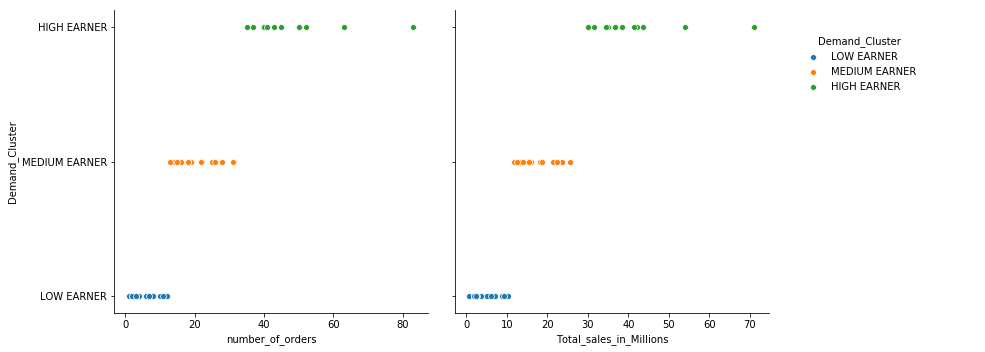

In [308]:
#Check the spread of the Number of Orders, Total Saels(in Millions) of the 3 clusters
g=sns.pairplot(temp,
 y_vars=["Demand_Cluster"],
x_vars=["number_of_orders","Total_sales_in_Millions"],hue="Demand_Cluster",height=5)
g._legend.set_bbox_to_anchor((1.1, 0.8))
plt.show(g)

## 3.2 Clustering/segmentation of State using KMeans algo into HIGH DEMAND, MEDIUM DEMAND and LOW DEMAND

In [309]:
#Executing SQL queries using Python to pull the State related data from the database.
query = '''select State,count(*) as number_of_orders, ROUND(sum(Sales)/1000000, 2) as Total_sales_in_Millions,ROUND((sum(Sales)/count(*))/1000000 , 2)  as Average_saleprice_per_order_in_Millions from temp group by State;'''
df = pd.read_sql_query(query,engine)

In [310]:
#Create 3 Clusters using KMeans algo based on the columns Average_saleprice_per_order_in_Millions & number_of_orders from the dataframe named df
kmeans = KMeans(n_clusters=3, random_state=0).fit(df[['Average_saleprice_per_order_in_Millions','number_of_orders']])
kmeans.labels_

array([0, 2, 0, 2, 1, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 1, 2, 2,
       0, 0, 2, 2, 2])

In [311]:
#Creating a temporary dataframe to store the Cluster values created using KMeans algorithm
temp=pd.DataFrame(kmeans.labels_)
temp.columns = ['Cluster']

In [312]:
#Concatenating the original dataframe along with a new column which contains the Clustering values returned by the KMeans algorithm
temp = pd.concat([df, temp], axis=1, join_axes=[df.index])

C:\Users\mdami\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  


In [313]:
#Creating a new column named Demand_Cluster based on the Clustering values returned by KMeans algo
#if KMeans value =1 then HIGH DEMAND
#if KMeans value =2 then MEDIUM DEMAND
#if KMeans value =0 then LOW DEMAND
temp.loc[temp.Cluster ==0, 'Demand_Cluster'] = 'MEDIUM DEMAND' 
temp.loc[temp.Cluster ==1, 'Demand_Cluster'] = 'HIGH DEMAND' 
temp.loc[temp.Cluster ==2, 'Demand_Cluster'] = 'LOW DEMAND' 


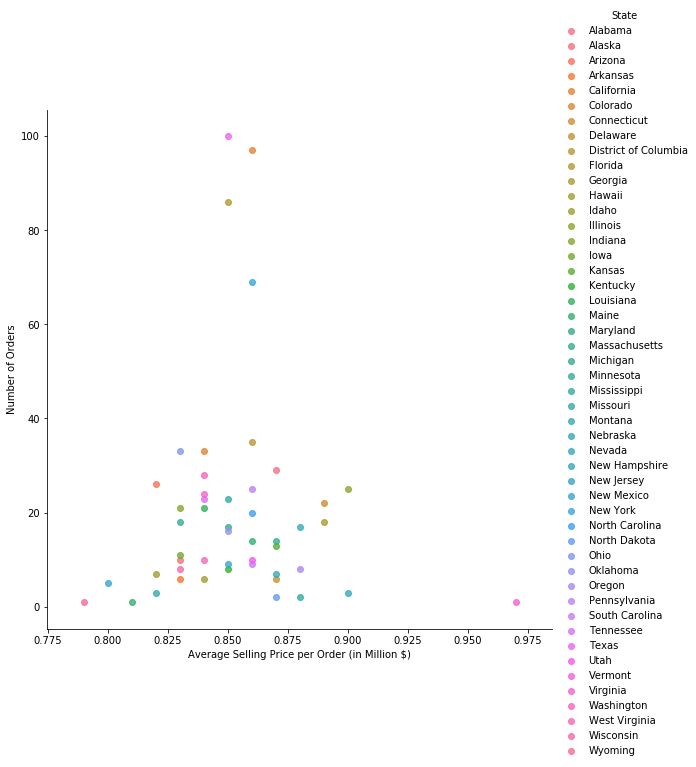

In [314]:
#Original View based on the Number of Orders and Average Selling Price per Order (in Million $), points are colored by State
g=sns.lmplot( x='Average_saleprice_per_order_in_Millions', y='number_of_orders', data=df, fit_reg=False, hue='State', legend=True,height=8)
g.set_axis_labels("Average Selling Price per Order (in Million $)",
 "Number of Orders") 

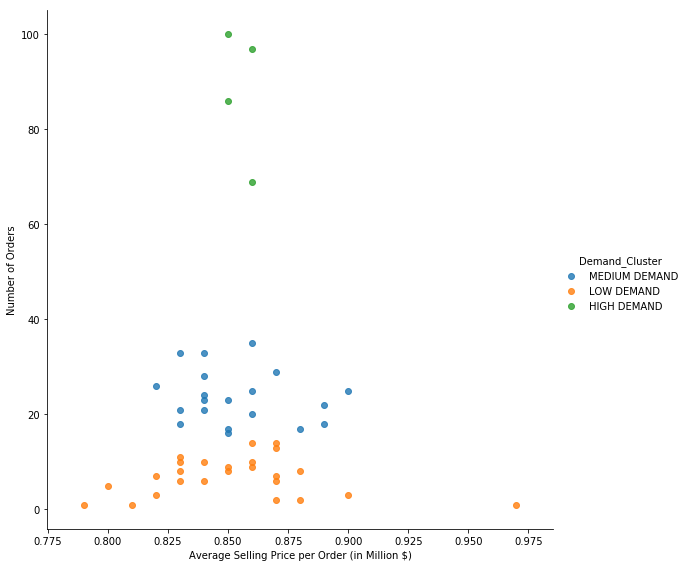

In [315]:
#Clustered View based on Number of Orders and Average Selling Price per Order (in Million $), points are colored by Clustering values
g=sns.lmplot( y='number_of_orders',x='Average_saleprice_per_order_in_Millions', data=temp, fit_reg=False, hue='Demand_Cluster', legend=True,height=8)
g.set_axis_labels("Average Selling Price per Order (in Million $)", "Number of Orders")
plt.show(g)

In [316]:
#A view of the final data frame consisting of the Car Brand data and Cluster column(gives values that was generated using KMeans algo)
#and Demand_Cluster column(gives values as HIGH DEMAND, MEDIUM DEMAND AND LOW DEMAND based on Clustering values)
temp

,State,number_of_orders,Total_sales_in_Millions,Average_saleprice_per_order_in_Millions,Cluster,Demand_Cluster
0,Alabama,29,25.26,0.87,0,MEDIUM DEMAND
1,Alaska,10,8.28,0.83,2,LOW DEMAND
2,Arizona,26,21.44,0.82,0,MEDIUM DEMAND
3,Arkansas,6,5.01,0.83,2,LOW DEMAND
4,California,97,83.41,0.86,1,HIGH DEMAND
5,Colorado,33,27.62,0.84,0,MEDIUM DEMAND
6,Connecticut,22,19.69,0.89,0,MEDIUM DEMAND
7,Delaware,6,5.21,0.87,2,LOW DEMAND
8,District of Columbia,35,30.13,0.86,0,MEDIUM DEMAND
9,Florida,86,73.50,0.85,1,HIGH DEMAND


In [317]:
#Lets check the State from the HIGH DEMAND cluster
temp[temp['Cluster']==1]

,State,number_of_orders,Total_sales_in_Millions,Average_saleprice_per_order_in_Millions,Cluster,Demand_Cluster
4,California,97,83.41,0.86,1,HIGH DEMAND
9,Florida,86,73.50,0.85,1,HIGH DEMAND
32,New York,69,59.29,0.86,1,HIGH DEMAND
41,Texas,100,84.59,0.85,1,HIGH DEMAND


In [318]:
#Lets check the State from the MEDIUM DEMAND cluster
temp[temp['Cluster']==0]

,State,number_of_orders,Total_sales_in_Millions,Average_saleprice_per_order_in_Millions,Cluster,Demand_Cluster
0,Alabama,29,25.26,0.87,0,MEDIUM DEMAND
2,Arizona,26,21.44,0.82,0,MEDIUM DEMAND
5,Colorado,33,27.62,0.84,0,MEDIUM DEMAND
6,Connecticut,22,19.69,0.89,0,MEDIUM DEMAND
8,District of Columbia,35,30.13,0.86,0,MEDIUM DEMAND
10,Georgia,18,16.02,0.89,0,MEDIUM DEMAND
13,Illinois,25,22.59,0.90,0,MEDIUM DEMAND
14,Indiana,21,17.53,0.83,0,MEDIUM DEMAND
18,Louisiana,21,17.70,0.84,0,MEDIUM DEMAND
22,Michigan,17,14.44,0.85,0,MEDIUM DEMAND


In [319]:
#Lets check the State from the LOW DEMAND cluster
temp[temp['Cluster']==2]

,State,number_of_orders,Total_sales_in_Millions,Average_saleprice_per_order_in_Millions,Cluster,Demand_Cluster
1,Alaska,10,8.28,0.83,2,LOW DEMAND
3,Arkansas,6,5.01,0.83,2,LOW DEMAND
7,Delaware,6,5.21,0.87,2,LOW DEMAND
11,Hawaii,6,5.05,0.84,2,LOW DEMAND
12,Idaho,7,5.76,0.82,2,LOW DEMAND
15,Iowa,11,9.16,0.83,2,LOW DEMAND
16,Kansas,13,11.29,0.87,2,LOW DEMAND
17,Kentucky,8,6.79,0.85,2,LOW DEMAND
19,Maine,1,0.81,0.81,2,LOW DEMAND
20,Maryland,14,12.03,0.86,2,LOW DEMAND


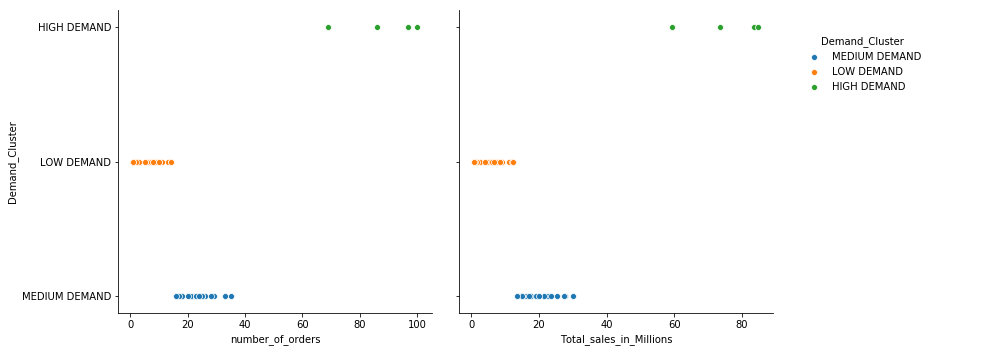

In [320]:
#Check the spread of the Number of Orders, Total Saels(in Millions) of the 3 clusters
g=sns.pairplot(temp,
y_vars=["Demand_Cluster"],
x_vars=["number_of_orders","Total_sales_in_Millions"],hue="Demand_Cluster",height=5)
g._legend.set_bbox_to_anchor((1.1, 0.8))
plt.show(g)